## Predicción: Algortimos de regularización

#### 0 Librerias

In [128]:
# ============================================
# 0) Librerías
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.random.seed(42)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

#### 1 Cargar datos

In [129]:
# ============================================
# 1) Cargamos los datos
# ============================================
df = pd.read_csv('regularización.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tienda_id          2400 non-null   int64  
 1   semana_id          2400 non-null   int64  
 2   region             2400 non-null   object 
 3   tienda_tipo        2400 non-null   object 
 4   mes                2400 non-null   int64  
 5   precio_promedio    2328 non-null   float64
 6   descuento_pct      2328 non-null   float64
 7   gasto_marketing    2328 non-null   float64
 8   trafico_tienda     2328 non-null   float64
 9   competidor_precio  2328 non-null   float64
 10  online_share       2328 non-null   float64
 11  stockouts_semana   2400 non-null   int64  
 12  rating_google      2328 non-null   float64
 13  ingreso_zona       2328 non-null   float64
 14  ventas             2400 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 281.4+ KB


In [130]:
df.head(10)

,tienda_id,semana_id,region,tienda_tipo,mes,precio_promedio,descuento_pct,gasto_marketing,trafico_tienda,competidor_precio,online_share,stockouts_semana,rating_google,ingreso_zona,ventas
0,0,0,Centro,A,1,102.17,0.12,"1,605.06",282.82,103.11,0.22,0,4.26,"35,065.85","6,191.54"
1,0,1,Sur,A,2,115.64,0.41,"1,847.34",279.89,120.33,0.18,0,4.16,"31,568.79","5,761.80"
2,0,2,Centro,B,3,107.03,0.01,"3,282.66",367.08,108.08,0.31,1,4.33,"28,321.26","5,954.22"
3,0,3,Centro,A,4,95.05,0.16,995.52,225.55,100.30,0.12,0,3.26,"39,035.87","5,196.12"
4,0,4,Norte,B,5,103.09,0.17,"2,500.65",259.12,103.48,0.24,1,4.09,"39,003.63","7,000.98"
5,0,5,Norte,B,6,97.11,0.32,"4,500.06",390.05,100.05,0.38,0,3.84,"38,973.63","10,272.51"
6,0,6,Norte,A,7,100.09,0.13,"2,954.99",300.77,94.55,0.30,1,4.55,"37,565.58","8,233.94"
7,0,7,Sur,A,8,96.09,0.29,"2,525.33",297.37,87.27,0.33,1,4.28,"40,668.19","6,801.58"
8,0,8,Centro,C,9,98.03,0.20,"2,961.22",285.93,95.65,0.12,1,4.17,"43,436.42","5,288.76"
9,0,9,Centro,B,10,102.55,0.26,"5,661.38",406.93,95.42,0.17,1,3.97,"23,741.49","6,489.30"


#### 2 Estadísticos descriptivos

In [131]:
# ============================================
# 2) EDA: descriptivos, histogramas, dispersión
# ============================================
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
tienda_id,"2,400.00",59.50,34.65,0.00,29.75,59.50,89.25,119.00
semana_id,"2,400.00",9.50,5.77,0.00,4.75,9.50,14.25,19.00
mes,"2,400.00",5.70,3.20,1.00,3.00,5.50,8.00,12.00
precio_promedio,"2,328.00",99.50,11.96,61.88,91.50,99.56,107.48,137.82
descuento_pct,"2,328.00",0.20,0.11,0.00,0.11,0.18,0.27,0.45
gasto_marketing,"2,328.00","3,375.44","1,810.86",500.00,"2,125.46","3,004.14","4,209.30","19,707.31"
trafico_tienda,"2,328.00",302.39,66.34,132.56,257.97,294.09,338.67,776.35
competidor_precio,"2,328.00",99.55,12.71,60.00,91.13,99.38,107.98,141.13
online_share,"2,328.00",0.25,0.08,0.00,0.19,0.25,0.30,0.54
stockouts_semana,"2,400.00",0.60,0.77,0.00,0.00,0.00,1.00,4.00


In [132]:
df.isna().sum().sort_values(ascending=False)

descuento_pct        72
precio_promedio      72
rating_google        72
online_share         72
competidor_precio    72
trafico_tienda       72
gasto_marketing      72
ingreso_zona         72
tienda_tipo           0
semana_id             0
region                0
tienda_id             0
mes                   0
stockouts_semana      0
ventas                0
dtype: int64

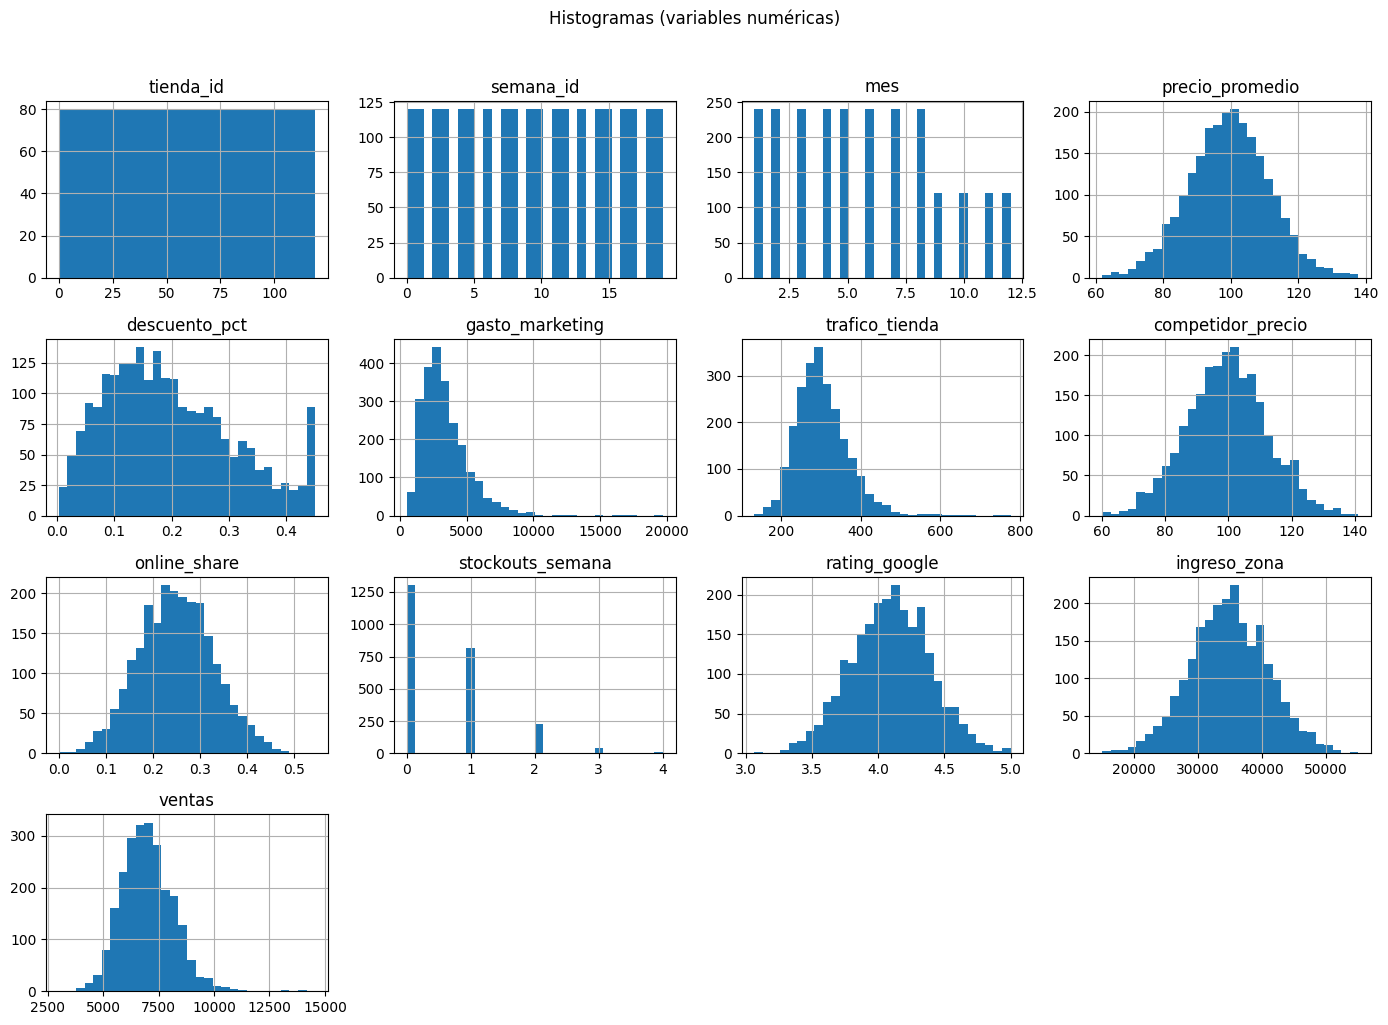

In [133]:

# Histogramas numéricos
num_cols = df.select_dtypes('number').columns.tolist()
df[num_cols].hist(bins=30, figsize=(14,10))
plt.suptitle('Histogramas (variables numéricas)', y=1.02)
plt.tight_layout()
plt.show()


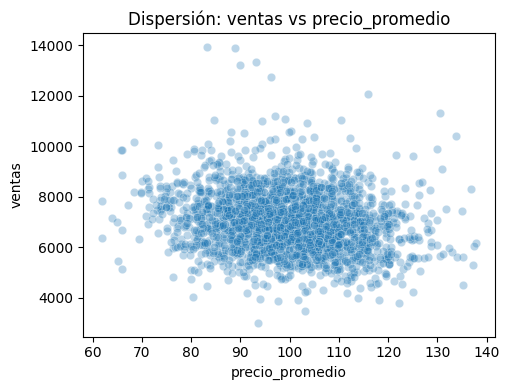

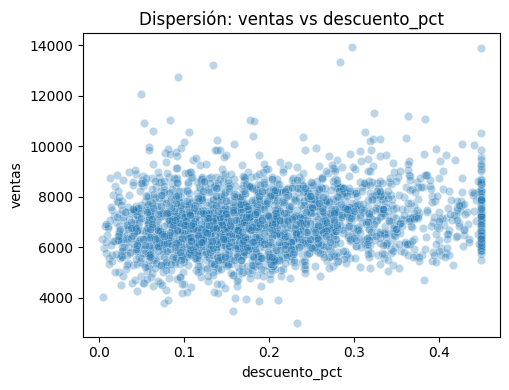

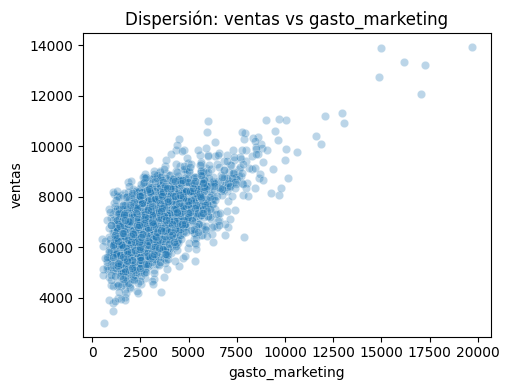

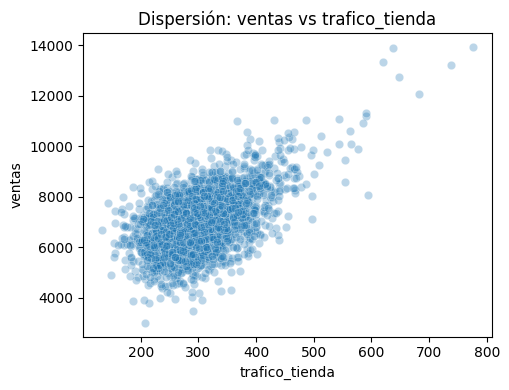

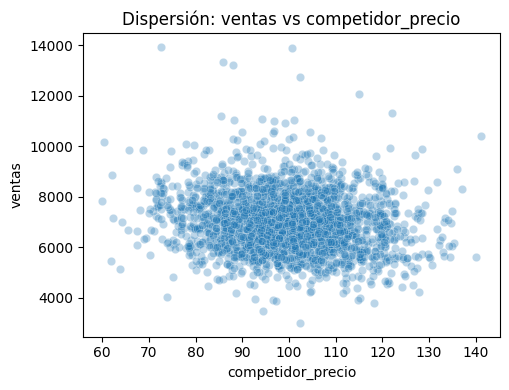

In [134]:
# Dispersión vs ventas (subset de drivers)
drivers = ['precio_promedio','descuento_pct','gasto_marketing','trafico_tienda','competidor_precio']
for col in drivers:
    plt.figure(figsize=(5.2,4))
    sns.scatterplot(data=df, x=col, y='ventas', alpha=0.3)
    plt.title(f'Dispersión: ventas vs {col}')
    plt.tight_layout()
    plt.show()

#### 3 Limpieza de datos

In [135]:
# ============================================
# 3) Limpieza: outliers (IQR)
# ============================================

# Definimos función para detectar outliers con IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
# Aplicamos la función a las variables numéricas
num_cols = df.select_dtypes('number').columns.tolist()
outlier_indices = set()
for col in num_cols:
    outlier_indices.update(detect_outliers_iqr(df, col))
# Eliminamos los outliers
df_clean = df.drop(index=outlier_indices).reset_index(drop=True)
print(f'Outliers eliminados: {len(outlier_indices)}')
print(f'Tamaño original: {df.shape}, Tamaño limpio: {df_clean.shape}')  
df = df_clean.copy()

Outliers eliminados: 206
Tamaño original: (2400, 15), Tamaño limpio: (2194, 15)


#### 4 Mapa de Correlación

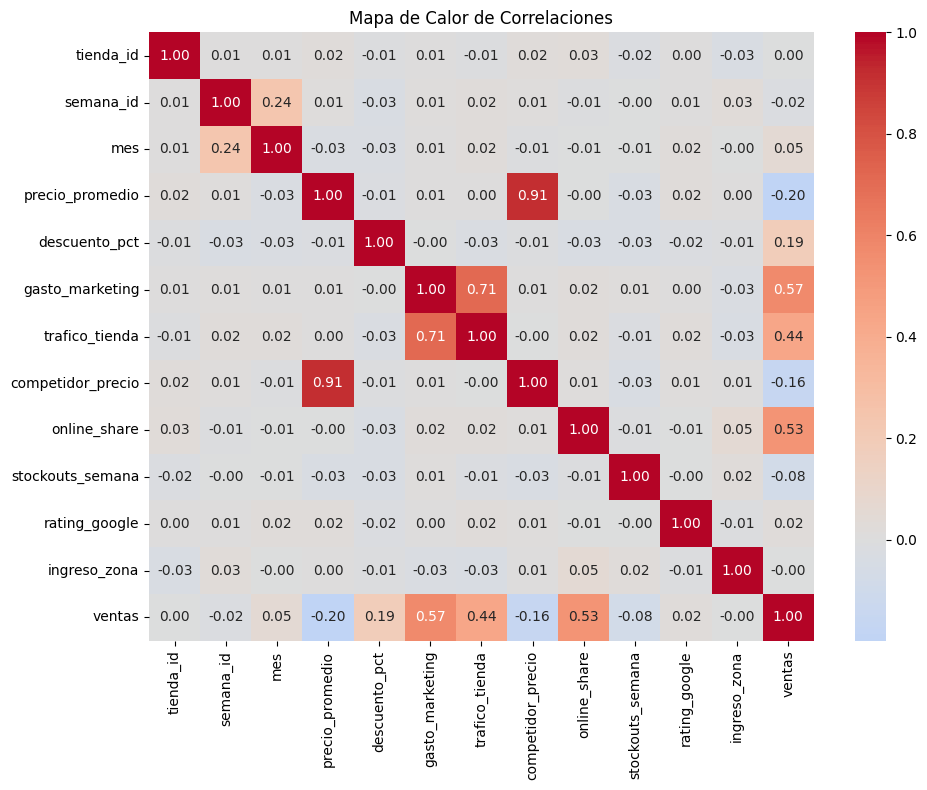

In [136]:
# ============================================
# 4) Correlación (heatmap) en numéricas
# ============================================
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0) #center=0: obliga a que el color neutro (blanco) corresponda a 0.
plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()
plt.show()

#### 5 Preprocesamiento + Split

In [137]:
# ============================================
# 5)  Preprocesamiento (imputación, escala, OHE) + Split
# ============================================
target = 'ventas'
X = df.drop(columns=[target])
y = df[target]

# 2. Identificar numéricas y categóricas
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X.select_dtypes(exclude=['int64','float64']).columns.tolist()

# 3. Definir los pipelines
numeric_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, num_features),
        ('cat', categorical_pipe, cat_features)
    ],
    remainder='drop'
)




#### 6 Aplicamos modelos

In [138]:
# ============================================
# 6) Modelos con CV: Lasso, Ridge, Elastic Net
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

alphas = np.logspace(-3, 3, 60)

lasso_pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('model', LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=20000))
])

ridge_pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('model', RidgeCV(alphas=alphas, cv=5))
])

enet_pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('model', ElasticNetCV(alphas=alphas,
                           l1_ratio=np.linspace(0.1, 0.9, 9),
                           cv=5, random_state=42, max_iter=20000))
])

lasso_pipe.fit(X_train, y_train)
ridge_pipe.fit(X_train, y_train)
enet_pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tienda_id', 'semana_id',
                                                   'mes', 'precio_promedio',
                                                   'descuento_pct',
                                                   'gasto_marketing',
                                                   'trafico_tienda',
                                                   'competidor_precio',
                                                   'online_share',
                                                   'stockouts_semana',
                                                   'rating_google',
                                                   'ingreso_zona']),
                                                 ('cat',
                                                  Pi...
       1.16895182e+01, 1.47737765e+01, 1.86718109e+01, 2.35983347e+01,
       2.98247129e+01, 3.76939098e+01, 4.76393801e+01, 6.02089449e+01,
       7.60949669e+01, 9.61724871e+01, 1.21547425e+02, 1.53617495e+02,
       1.94149195e+02, 2.45375111e+02, 3.10116893e+02, 3.91940677e+02,
       4.95353521e+02, 6.26051657e+02, 7.91234262e+02, 1.00000000e+03]),
                              cv=5,
                              l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                              max_iter=20000, random_state=42))])

#### 7 Métricas de ajuste

In [139]:
# ============================================
# 7) Métricas: ME, MAE, RMSE
# ============================================
def metrics(y_true, y_pred):
    me = np.mean(y_pred - y_true)                   # Mean Error (sesgo)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return me, mae, rmse

def evaluate_model(name, pipe):
    yhat = pipe.predict(X_test)
    me, mae, rmse = metrics(y_test, yhat)
    return {'Modelo': name, 'ME': me, 'MAE': mae, 'RMSE': rmse}

results = pd.DataFrame([
    evaluate_model('Lasso', lasso_pipe),
    evaluate_model('Ridge', ridge_pipe),
    evaluate_model('ElasticNet', enet_pipe)
]).sort_values('RMSE')

print("\n>> Métricas en test (ordenado por RMSE):\n")
display(results)

# Seleccionar mejor modelo
best_name = results.iloc[0]['Modelo']
best_pipe = {'Lasso': lasso_pipe, 'Ridge': ridge_pipe, 'ElasticNet': enet_pipe}[best_name]


>> Métricas en test (ordenado por RMSE):



,Modelo,ME,MAE,RMSE
1,Ridge,2.02,449.07,565.22
2,ElasticNet,2.03,449.08,565.23
0,Lasso,1.59,449.24,565.33


In [140]:
# ============================================
# 8) Variables retenidas / más influyentes por cada modelo
# ============================================
# Extraer el scaler de las numéricas
scaler = preprocess.named_transformers_['num'].named_steps['scaler']
scales = pd.Series(scaler.scale_, index=num_features)

def unscale_coefs(pipe, num_features):
    feature_names = pipe.named_steps['prep'].get_feature_names_out()
    coefs = pd.Series(pipe.named_steps['model'].coef_, index=feature_names)
    coefs_unscaled = coefs.copy()
    for f in num_features:
        name = f"num__{f}"
        if name in coefs_unscaled.index:
            coefs_unscaled[name] = coefs_unscaled[name] / scales[f]
    return coefs_unscaled

coefs_lasso_unscaled = unscale_coefs(lasso_pipe, num_features)
coefs_ridge_unscaled = unscale_coefs(ridge_pipe, num_features)
coefs_enet_unscaled  = unscale_coefs(enet_pipe,  num_features)

# Tablas con los coeficientes más influyentes
coef_table_lasso = coefs_lasso_unscaled[coefs_lasso_unscaled != 0] \
    .sort_values(key=abs, ascending=False).reset_index()
coef_table_lasso.columns = ['Variable', 'Coeficiente (escala original)']

coef_table_ridge = coefs_ridge_unscaled.sort_values(key=abs, ascending=False).reset_index()
coef_table_ridge.columns = ['Variable', 'Coeficiente (escala original)']

coef_table_enet = coefs_enet_unscaled[coefs_enet_unscaled != 0] \
    .sort_values(key=abs, ascending=False).reset_index()
coef_table_enet.columns = ['Variable', 'Coeficiente (escala original)']

print("\n>> Coeficientes de Lasso en escala original:")
print(coef_table_lasso.head(15))

print("\n>> Coeficientes de Ridge en escala original:")
print(coef_table_ridge.head(15))

print("\n>> Coeficientes de ElasticNet en escala original:")
print(coef_table_enet.head(15))


>> Coeficientes de Lasso en escala original:
                  Variable  Coeficiente (escala original)
0        num__online_share                       6,928.07
1       num__descuento_pct                       1,877.81
2        cat__region_Norte                         275.00
3       cat__tienda_tipo_A                         191.26
4       cat__tienda_tipo_C                        -181.00
5          cat__region_Sur                        -139.53
6    num__stockouts_semana                        -122.76
7       num__rating_google                         107.51
8     num__precio_promedio                         -23.45
9                 num__mes                          13.67
10  num__competidor_precio                           6.91
11          num__semana_id                          -5.59
12     num__trafico_tienda                           0.90
13    num__gasto_marketing                           0.39
14          num__tienda_id                          -0.09

>> Coeficientes de Ridge 

In [143]:
# ============================================
# 8-bis) Reescalar coeficientes a la escala original
# ============================================

def top_n(coefs_unscaled, n=15):
    """ Devuelve top n coeficientes en valor absoluto """
    return coefs_unscaled[coefs_unscaled != 0] \
        .sort_values(key=abs, ascending=False).head(n)

top_lasso = top_n(coefs_lasso_unscaled, 20).reset_index()
top_lasso.columns = ['Variable', 'Lasso']

top_ridge = top_n(coefs_ridge_unscaled, 20).reset_index()
top_ridge.columns = ['Variable', 'Ridge']

top_enet = top_n(coefs_enet_unscaled, 20).reset_index()
top_enet.columns = ['Variable', 'ElasticNet']

# Combinar en una sola tabla comparativa
coef_comparativa = pd.merge(top_lasso, top_ridge, on='Variable', how='outer')
coef_comparativa = pd.merge(coef_comparativa, top_enet, on='Variable', how='outer')

print("\n>> Comparativa de variables más influyentes (Top 20 en cada modelo):")
display(coef_comparativa)



>> Comparativa de variables más influyentes (Top 20 en cada modelo):


,Variable,Lasso,Ridge,ElasticNet
0,cat__region_Centro,NaN,-44.75,-41.58
1,cat__region_Norte,275.00,228.92,231.79
2,cat__region_Sur,-139.53,-184.17,-180.90
3,cat__tienda_tipo_A,191.26,187.44,190.40
4,cat__tienda_tipo_B,NaN,-3.54,-0.33
5,cat__tienda_tipo_C,-181.00,-183.89,-180.47
6,num__competidor_precio,6.91,6.92,6.87
7,num__descuento_pct,"1,877.81","1,876.23","1,875.66"
8,num__gasto_marketing,0.39,0.39,0.39
9,num__ingreso_zona,-0.00,-0.00,-0.00


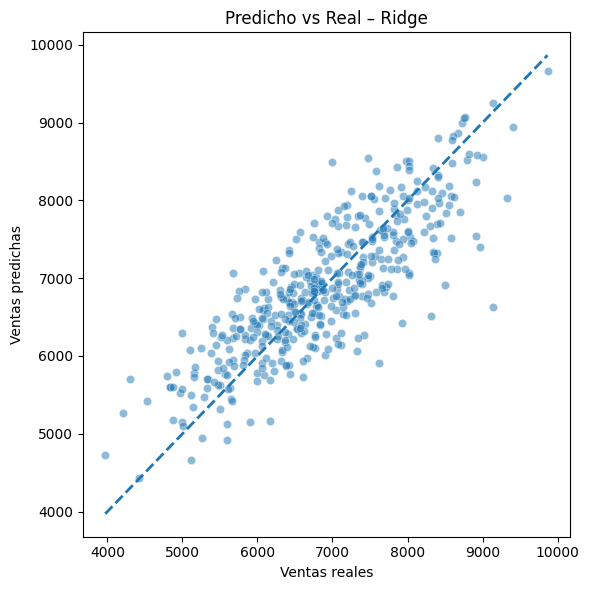

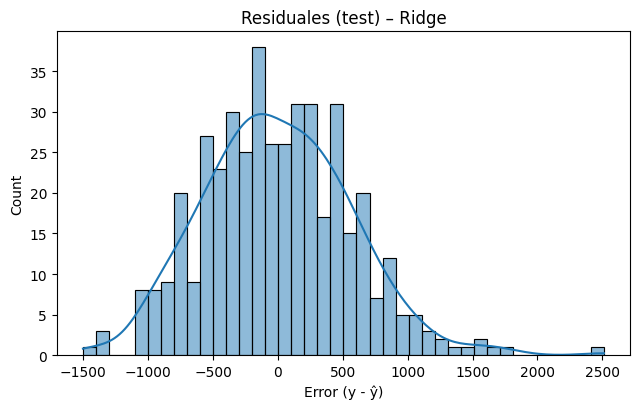

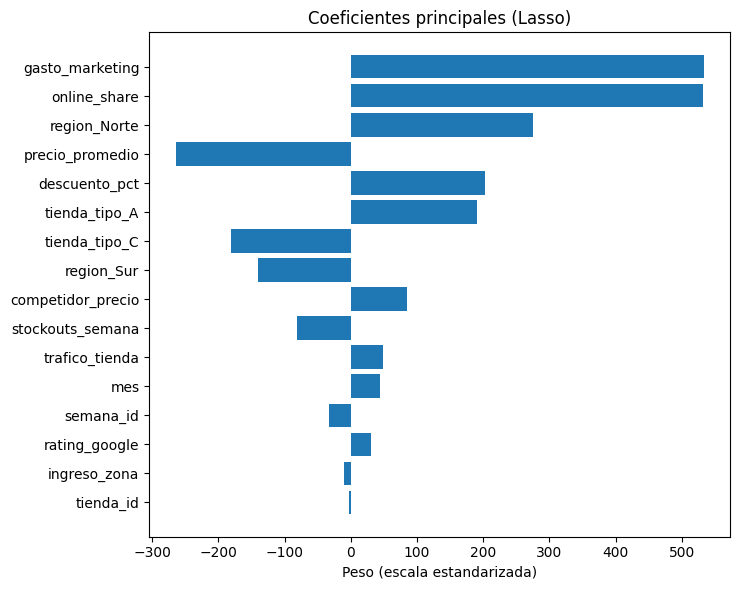

In [145]:
# ============================================
# 9) Gráficos de desempeño y coeficientes
# ============================================
# Predicho vs Real (mejor modelo)
y_pred_best = best_pipe.predict(X_test)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
mn = min(y_test.min(), y_pred_best.min())
mx = max(y_test.max(), y_pred_best.max())
plt.plot([mn, mx], [mn, mx], '--', linewidth=2)
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title(f'Predicho vs Real – {best_name}')
plt.tight_layout()
plt.show()

# Distribución de residuales
resid = y_test - y_pred_best
plt.figure(figsize=(6.5,4.2))
sns.histplot(resid, bins=40, kde=True)
plt.title(f'Residuales (test) – {best_name}')
plt.xlabel('Error (y - ŷ)')
plt.tight_layout()
plt.show()

# Coeficientes principales (ej. Lasso)
top_k = 20
# Selecciona los coeficientes distintos de cero y toma los top_k más grandes en valor absoluto
coef_plot = coef_lasso[np.abs(coef_lasso) > 1e-8].copy()
coef_plot = coef_plot.reindex(coef_plot.abs().sort_values(ascending=False).index).head(top_k)
plt.figure(figsize=(7.5,6))
plt.barh(coef_plot.index[::-1], coef_plot.values[::-1])  # reverse for descending order
plt.title('Coeficientes principales (Lasso)')
plt.xlabel('Peso (escala estandarizada)')
plt.tight_layout()
plt.show()